In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset/combined_data.csv


In [34]:
df = pd.read_csv("/kaggle/input/email-spam-classification-dataset/combined_data.csv")
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [35]:
print("Dataset Head:")
print(df.head())
print("\nOriginal Label Distribution (Counts):")
print(df['label'].value_counts())
print("\nOriginal Label Distribution (Percentages):")
print(df['label'].value_counts(normalize=True) * 100)

Dataset Head:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...

Original Label Distribution (Counts):
label
1    43910
0    39538
Name: count, dtype: int64

Original Label Distribution (Percentages):
label
1    52.619595
0    47.380405
Name: proportion, dtype: float64


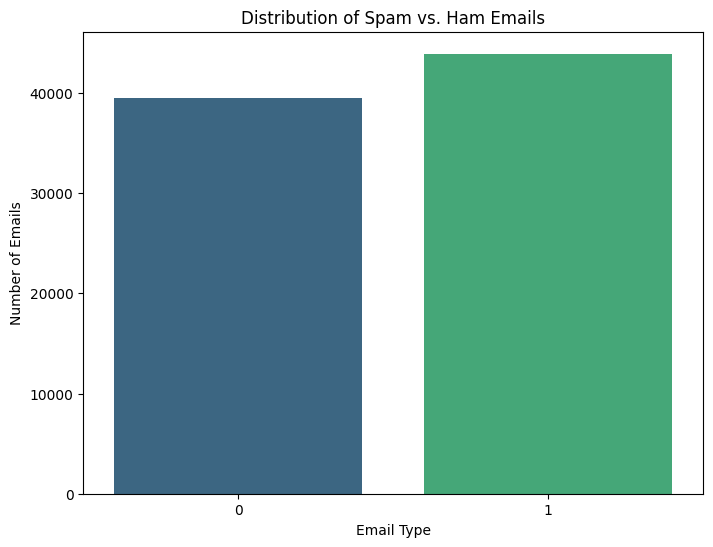

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam vs. Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Number of Emails') 
plt.show()

In [21]:
pip install pandas scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [49]:
def processed_text(text:str):
    if not isinstance(text,str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    processed_words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(processed_words)

In [55]:
df["processed_text"] = df["text"].apply(processed_text)

In [56]:
df["processed_text"]

0        ounc feather bowl hummingbird opec moment alab...
1        wulvob get medirc onlin qnb ikud viagra escape...
2        comput connect cnn com wednesday escapenumb ma...
3        univers degre obtain prosper futur money earn ...
4        thank answer guy know check rsync manual would...
                               ...                        
83443    hi given date get last date month data form yy...
83444    order softwar cd download site immedi delphi 7...
83445    dear valu member canadianpharmaci provid wide ...
83446    subscrib chang profil contact us long term esc...
83447    get life viagra help million men good caus wro...
Name: processed_text, Length: 83448, dtype: object

In [57]:
print("\nOriginal Text vs. Processed Text Example:")
print(df[['text', 'processed_text']].head())


Original Text vs. Processed Text Example:
                                                text  \
0  ounce feather bowl hummingbird opec moment ala...   
1  wulvob get your medircations online qnb ikud v...   
2   computer connection from cnn com wednesday es...   
3  university degree obtain a prosperous future m...   
4  thanks for all your answers guys i know i shou...   

                                      processed_text  
0  ounc feather bowl hummingbird opec moment alab...  
1  wulvob get medirc onlin qnb ikud viagra escape...  
2  comput connect cnn com wednesday escapenumb ma...  
3  univers degre obtain prosper futur money earn ...  
4  thank answer guy know check rsync manual would...  


In [58]:
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8, ngram_range=(1,2))
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (66758, 5000)
Testing data shape: (16690, 5000)


In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [81]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [94]:
def evaluation(y_pred,model_name):
    print(f"{model_name} performance")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    print("Confusion Matrix:\n")
    disp_nb = confusion_matrix(y_test, y_pred)
    disp_nb = ConfusionMatrixDisplay(confusion_matrix=disp_nb, display_labels=['Ham', 'Spam'])
    disp_nb.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix:{model_name}  Model')
    plt.show()

Multinomial Naive Bayes performance
Accuracy: 0.9696
Precision: 0.9686
Recall: 0.9736
F1-Score: 0.9711
Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      0.97      0.97      7938
        Spam       0.97      0.97      0.97      8752

    accuracy                           0.97     16690
   macro avg       0.97      0.97      0.97     16690
weighted avg       0.97      0.97      0.97     16690

Confusion Matrix:



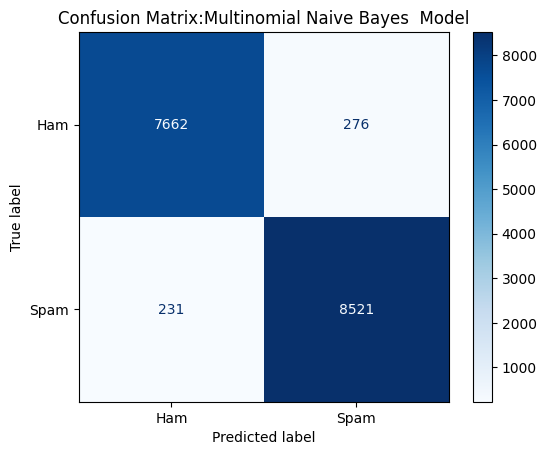

In [95]:
y_pred_nb = nb_model.predict(X_test)
evaluation(y_pred_nb,"Multinomial Naive Bayes")

In [92]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(random_state=42, dual=False)
svm_model.fit(X_train, y_train)

LinearSVC(dual=False, random_state=42)

SVM Model performance
Accuracy: 0.9859
Precision: 0.9840
Recall: 0.9893
F1-Score: 0.9866
Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      7938
        Spam       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

Confusion Matrix:



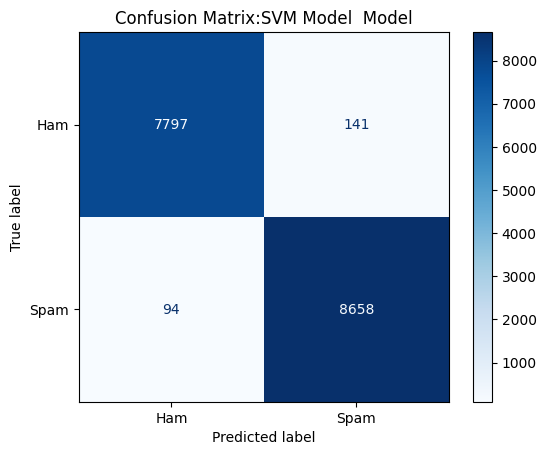

In [96]:
y_pred_svm = svm_model.predict(X_test)
evaluation(y_pred_svm,"SVM Model")

In [98]:
import pickle
with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


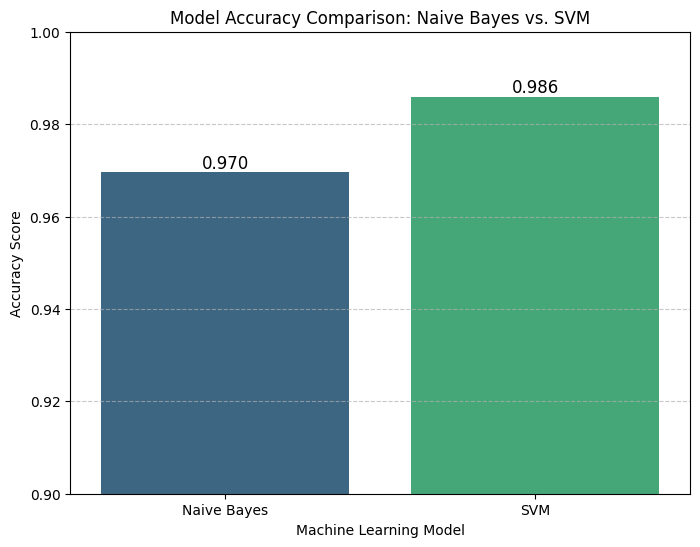

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


accuracy_nb =accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


accuracy_data = {
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [accuracy_nb, accuracy_svm]
}
accuracy_df = pd.DataFrame(accuracy_data)


plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


for index, row in accuracy_df.iterrows():
    plt.text(row.name, row.Accuracy, f'{row.Accuracy:.3f}', color='black', ha="center", va='bottom', fontsize=12)

plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison: Naive Bayes vs. SVM')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()